## Objectives 

### Demo: How to work with database

Visualize the distribution of data.

Visualize the relationship between two features.

Visualize composition of data.

Visualize comparison of data.



In [14]:
!python -m pip install --upgrade pip

!pip install wget


In [16]:
import wget

url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite'
filename = wget.download(url)

print(f"Fichier téléchargé sous le nom : {filename}")

100% [........................................................................] 36679680 / 36679680Fichier téléchargé sous le nom : m4_survey_data.sqlite


####  Connect to the database.

In [33]:
import sqlite3
conn= sqlite3.connect("m4_survey_data.sqlite")

In [18]:
import pandas as pd

### How to run an sql query

In [19]:
QUERY = """
SELECT COUNT(*)
FROM master
"""
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


#### How to list all tables

In [21]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


In [22]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)


,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


In [ ]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

### Visualizing distribution of data

In [24]:
QUERY = "SELECT ConvertedComp FROM master"

# Read the data into a DataFrame
df = pd.read_sql_query(QUERY, conn)

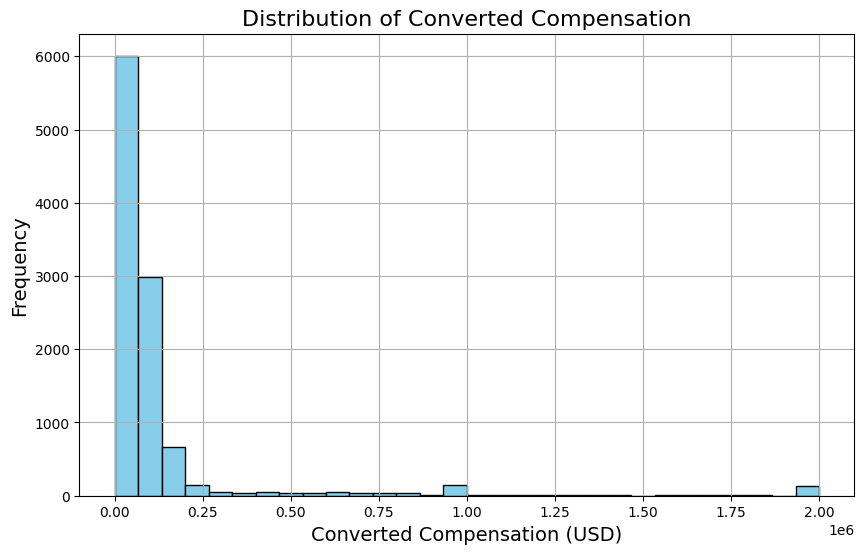

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(df['ConvertedComp'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Converted Compensation', fontsize=16)
plt.xlabel('Converted Compensation (USD)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)
plt.show()

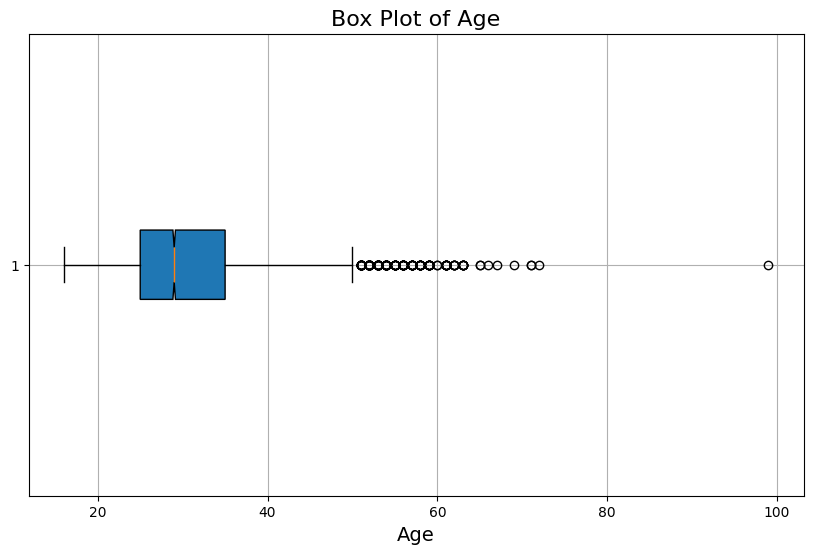

In [26]:
QUERY = "SELECT Age FROM master"

# Read the data into a DataFrame
df = pd.read_sql_query(QUERY, conn)

# Plotting the box plot of the Age column
plt.figure(figsize=(10, 6))
plt.boxplot(df['Age'].dropna(), vert=False, patch_artist=True, notch=True)
plt.title('Box Plot of Age', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.grid(True)
plt.show()

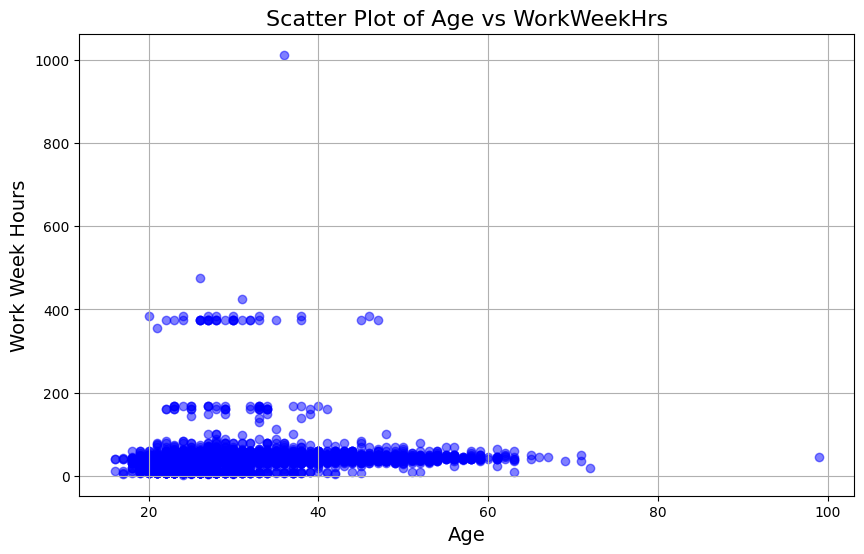

In [27]:
QUERY = """
SELECT Age, WorkWeekHrs
FROM master
"""

# Read the data into a DataFrame
df = pd.read_sql_query(QUERY, conn)

# Close the database connection
conn.close()

# Drop rows where either Age or WorkWeekHrs is NaN
df_clean = df.dropna(subset=['Age', 'WorkWeekHrs'])

# Plotting the scatter plot of Age vs WorkWeekHrs
plt.figure(figsize=(10, 6))
plt.scatter(df_clean['Age'], df_clean['WorkWeekHrs'], alpha=0.5, color='blue')
plt.title('Scatter Plot of Age vs WorkWeekHrs', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Work Week Hours', fontsize=14)
plt.grid(True)
plt.show()

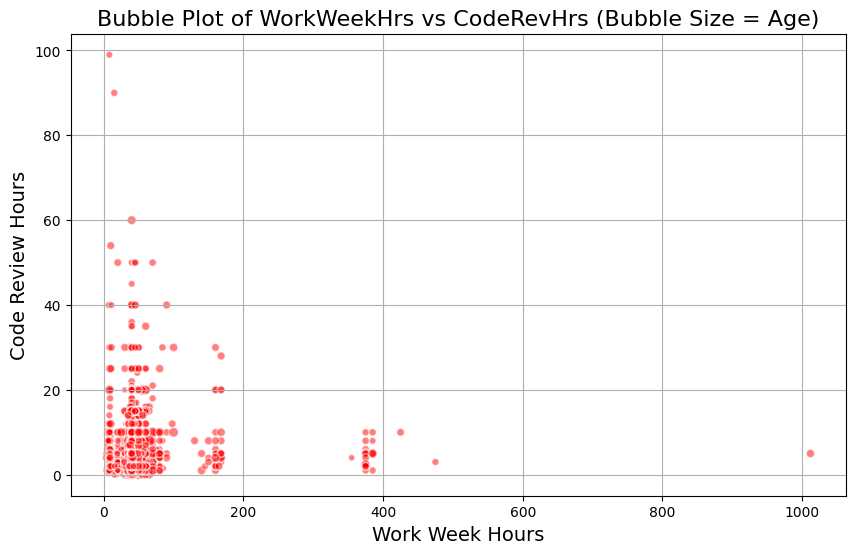

In [30]:
QUERY = """
SELECT WorkWeekHrs, CodeRevHrs, Age
FROM master
"""

# Read the data into a DataFrame
df = pd.read_sql_query(QUERY, conn)

# Close the database connection


# Drop rows where any of WorkWeekHrs, CodeRevHrs, or Age is NaN
df_clean = df.dropna(subset=['WorkWeekHrs', 'CodeRevHrs', 'Age'])

# Plotting the bubble plot
plt.figure(figsize=(10, 6))
plt.scatter(df_clean['WorkWeekHrs'], df_clean['CodeRevHrs'], 
            s=df_clean['Age'], alpha=0.5, color='red', edgecolor='w')

plt.title('Bubble Plot of WorkWeekHrs vs CodeRevHrs (Bubble Size = Age)', fontsize=16)
plt.xlabel('Work Week Hours', fontsize=14)
plt.ylabel('Code Review Hours', fontsize=14)
plt.grid(True)
plt.show()

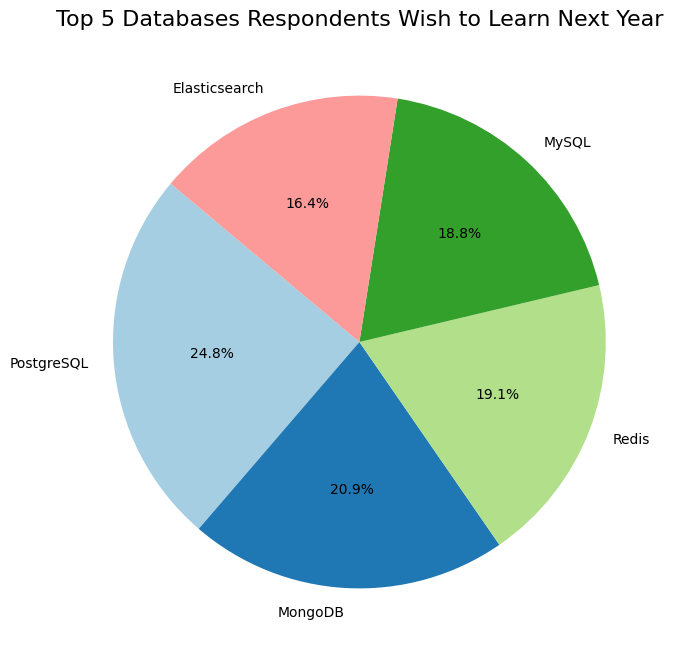

In [31]:
QUERY = """
SELECT DatabaseDesireNextYear
FROM DatabaseDesireNextYear
"""

# Read the data into a DataFrame
df = pd.read_sql_query(QUERY, conn)

# Close the database connection
conn.close()

# Split the multiple responses and explode them into individual rows
df_exploded = df['DatabaseDesireNextYear'].str.split(';').explode().dropna()

# Count the occurrences of each database
database_counts = df_exploded.value_counts()

# Get the top 5 databases
top_5_databases = database_counts.head(5)

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_5_databases, labels=top_5_databases.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Top 5 Databases Respondents Wish to Learn Next Year', fontsize=16)
plt.show()

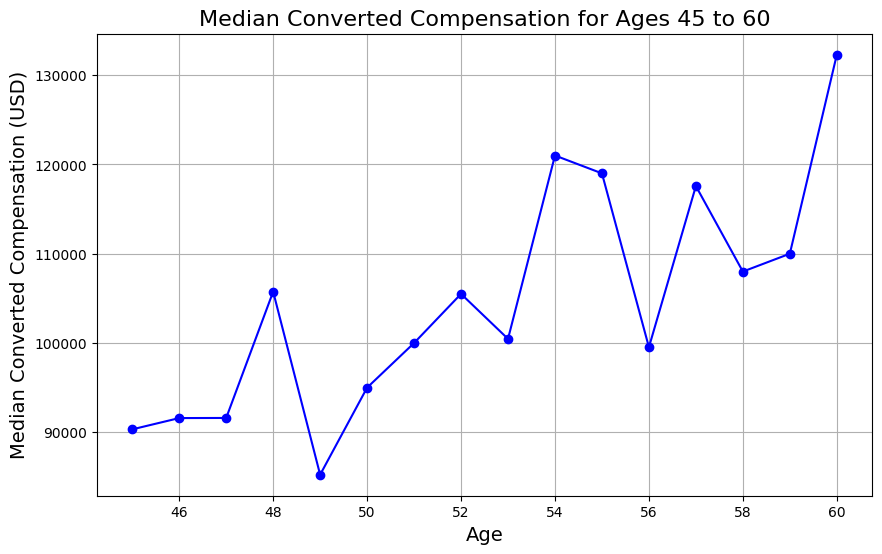

In [34]:
# your code goes here
QUERY = """
SELECT Age, ConvertedComp
FROM master
WHERE Age BETWEEN 45 AND 60
"""

# Read the data into a DataFrame
df = pd.read_sql_query(QUERY, conn)

# Close the database connection


# Calculate the median ConvertedComp for each age
median_comp = df.groupby('Age')['ConvertedComp'].median()

# Plotting the median ConvertedComp for each age
plt.figure(figsize=(10, 6))
median_comp.plot(kind='line', marker='o', color='blue')

plt.title('Median Converted Compensation for Ages 45 to 60', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Median Converted Compensation (USD)', fontsize=14)
plt.grid(True)
plt.show()


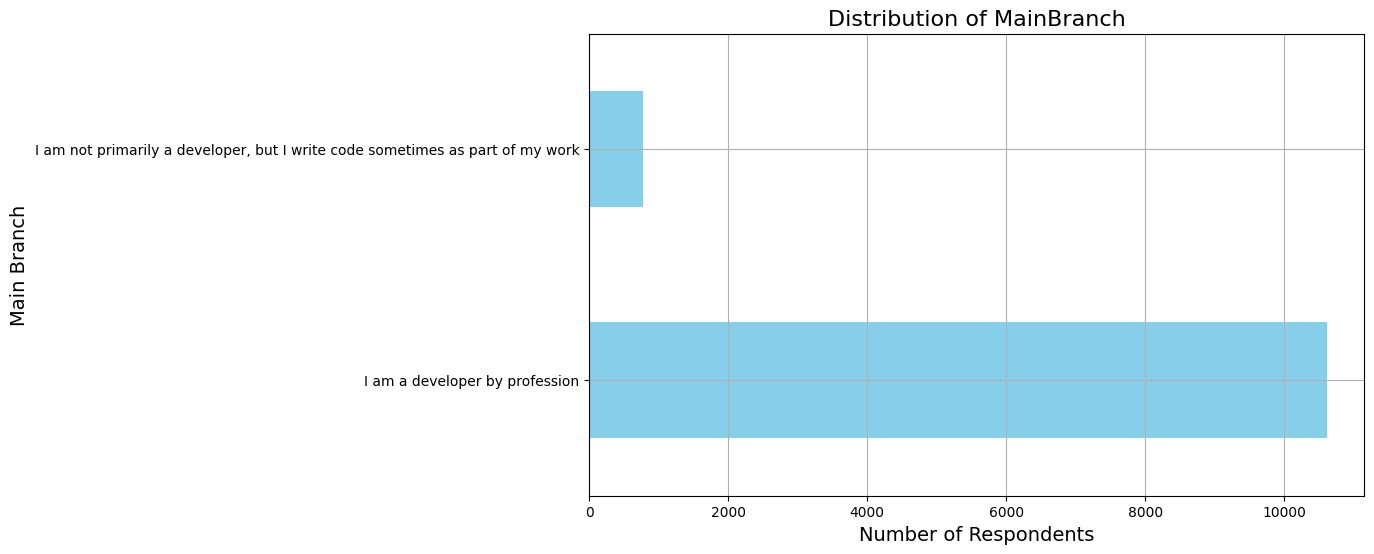

In [35]:
# your code goes here

QUERY = """
SELECT MainBranch
FROM master
"""

# Read the data into a DataFrame
df = pd.read_sql_query(QUERY, conn)



# Count the occurrences of each unique value in the MainBranch column
main_branch_counts = df['MainBranch'].value_counts()

# Plotting the horizontal bar chart
plt.figure(figsize=(10, 6))
main_branch_counts.plot(kind='barh', color='skyblue')

plt.title('Distribution of MainBranch', fontsize=16)
plt.xlabel('Number of Respondents', fontsize=14)
plt.ylabel('Main Branch', fontsize=14)
plt.grid(True)
plt.show()